# A simple experiment with the analytical queueing model

In [1]:
import ranking_and_selection as rs
import queueing_model as qm
import json
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Opening JSON file
with open('data_as_is.json') as json_file:
    data_as_is = json.load(json_file)
    
# Opening JSON file
with open('data_as_is_simulation.json') as json_file:
    data_as_is_simulation = json.load(json_file)
    
# Opening JSON file
with open('data_as_is_analytical.json') as json_file:
    data_as_is_analytical = json.load(json_file)

Here we perform a simple experiment in order to understand the effects of three different factors on the value of a simple objective function when we decide to build housing or shelter, and therefore our preference for housing or shelter. The three different factors are: 

* the point in time at which we add accommodation (housing or shelter)
* the relative cost of shelter compared to housing
* the rate at which customers are served in housing

We aim to isolate the effects of each of the three factors in order to gain this understanding. 

## Experiment setup

We start with the following 'as-is' parameters for the analytical model, which originate from the analytical counterpart of the simulation model of Singham et al. (2023). 

In [38]:
print('Initial capacity: ' + str(data_as_is['initial_capacity']))
print('Initial demand: ' + str(data_as_is['initial_demand']))
for i in range(4):
    print('Arrival rates yr ' + str(i+1) + ': ' + str(round(data_as_is['arrival_rates'][i],2)))
print('Time between changes in the build rate (weeks): ' + str(int(data_as_is['time_btwn_changes_in_build_rate']*365/7)))
print('Time between building (weeks): ' + str(int(data_as_is['time_btwn_building']*365/7)))

Initial capacity: {'housing': 40, 'shelter': 15}
Initial demand: 120
Arrival rates yr 1: 36.56
Arrival rates yr 2: 43.52
Arrival rates yr 3: 47.77
Arrival rates yr 4: 47.77
Time between changes in the build rate (weeks): 54
Time between building (weeks): 9


The two parameters left out above which we want to experiment with are the service times and the build rates. The service time for shelter we always set as 0, and for the housing service time means we will look at a range (and a correpsponding range of housing service rates): 

In [43]:
service_times = [1,2,3,4,5]
print('Housing service time means - range to be studied (yrs): ' + str(service_times))
print('Housing service rates - range to be studied (1/yrs): ' + str([round(1/i,2) for i in service_times]))

Housing service time means - range to be studied (yrs): [1, 2, 3, 4, 5]
Housing service rates - range to be studied (1/yrs): [1.0, 0.5, 0.33, 0.25, 0.2]


For the build rates, we start with a baseline of building 12 extra housing and 12 extra shelter units every year, for 4 years: 

In [51]:
sol = [{'housing': [12, 12, 12, 12], 'shelter': [12, 12, 12, 12]}]
print(sol)

[{'housing': [12, 12, 12, 12], 'shelter': [12, 12, 12, 12]}]


This gives us the following objective function values, with a simple objective function of the expected value of the time-averaged unsheltered queue: 

In [44]:
out = []
for i in range(len(service_times)):
    spc = rs.SolutionSpace(sol)
    spc.model_analytically(data_as_is, data_as_is_analytical, yrs, float(service_times[i]))
    out.append(spc.true_outputs_unsh[0])

In [50]:
for i in range(len(out)):
    print('Service rate: ' + str(round(1/service_times[4-i],2)) + ', Obj value: ' + str(round(out[4-i],2)))

Service rate: 0.2, Obj value: 77.07
Service rate: 0.25, Obj value: 71.44
Service rate: 0.33, Obj value: 62.05
Service rate: 0.5, Obj value: 43.39
Service rate: 1.0, Obj value: 15.41


We then experiment with adding to our baseline build rate in 8 different ways - adding extra shelter or adding extra housing in one of each of the four years. If we add extra housing in a particular year, then instead of the baseline 12 units we add 24 housing units in that year. If we add extra shelter in a particular year, then the amount of shelter units which we add depends on the cost of a shelter unit compared to housing. This cost we range from 1 to 0.4: 

In [58]:
additional_shelter = [0, 6, 12, 18]
print('Cost of shelter (as proportion of cost of housing) - range to be studied: ' + str([round(12/(12+i),2) for i in additional_shelter]))

Cost of shelter (as proportion of cost of housing) - range to be studied: [1.0, 0.67, 0.5, 0.4]


The effect of these costs is that if we add extra shelter units in a particular year, we add either 24, 36, 48 or 60 extra shelter units in that year.  

In summary: for every combination of 'housing service rate' and 'cost of shelter units' (and there are 20 combinations), we model 8 different solutions with the build rates given below, where 's' depends on the cost of shelter. And for each of these solutions, the model run depends on the 'housing service rate' which we are using. These build rates effectively amount to adding either extra shelter or extra housing in one of each of the four years. 

In [60]:
sols = [{'housing': [24, 12, 12, 12], 'shelter': [12, 12, 12, 12]},
                {'housing': [12, 24, 12, 12], 'shelter': [12, 12, 12, 12]},
                {'housing': [12, 12, 24, 12], 'shelter': [12, 12, 12, 12]},
                {'housing': [12, 12, 12, 24], 'shelter': [12, 12, 12, 12]},
                {'housing': [12, 12, 12, 12], 'shelter': ['s', 12, 12, 12]},
                {'housing': [12, 12, 12, 12], 'shelter': [12, 's', 12, 12]},
                {'housing': [12, 12, 12, 12], 'shelter': [12, 12, 's', 12]},
                {'housing': [12, 12, 12, 12], 'shelter': [12, 12, 12, 's']}]
for i in range(len(sols)):
    print(sols[i])

{'housing': [24, 12, 12, 12], 'shelter': [12, 12, 12, 12]}
{'housing': [12, 24, 12, 12], 'shelter': [12, 12, 12, 12]}
{'housing': [12, 12, 24, 12], 'shelter': [12, 12, 12, 12]}
{'housing': [12, 12, 12, 24], 'shelter': [12, 12, 12, 12]}
{'housing': [12, 12, 12, 12], 'shelter': ['s', 12, 12, 12]}
{'housing': [12, 12, 12, 12], 'shelter': [12, 's', 12, 12]}
{'housing': [12, 12, 12, 12], 'shelter': [12, 12, 's', 12]}
{'housing': [12, 12, 12, 12], 'shelter': [12, 12, 12, 's']}


## Results

The charts below illustrate the results. Each box is a selected combination of the housing service rate and the cost of accommodation. Within each box we plot with a dot the objective value of each of the eight solutions. We plot these objective values as a function of the year in which we added extra accommodation. 

In [ ]:
# Explore range of shelter costs and service time distributions
print('start at time ' + str(datetime.datetime.now()))
s_base = 12 # base amount of shelter
yrs = 4
additional_shelter = [0, 6, 12, 18]

#additional_shelter = [0, 6]
#service_times = [1, 2]
housing_imprv_all1_obj1 = [[] for i in range(len(additional_shelter))]
shelter_imprv_all1_obj1 = [[] for i in range(len(additional_shelter))]
housing_imprv_all1_obj2 = [[] for i in range(len(additional_shelter))]
shelter_imprv_all1_obj2 = [[] for i in range(len(additional_shelter))]
housing_imprv_all1_obj3 = [[] for i in range(len(additional_shelter))]
shelter_imprv_all1_obj3 = [[] for i in range(len(additional_shelter))]

for i in range(len(additional_shelter)):
    s = s_base + additional_shelter[i]
    for j in range(len(service_times)):
        sols = [{'housing': [24, 12, 12, 12], 'shelter': [12, 12, 12, 12]},
                {'housing': [12, 24, 12, 12], 'shelter': [12, 12, 12, 12]},
                {'housing': [12, 12, 24, 12], 'shelter': [12, 12, 12, 12]},
                {'housing': [12, 12, 12, 24], 'shelter': [12, 12, 12, 12]},
                {'housing': [12, 12, 12, 12], 'shelter': [2*s, 12, 12, 12]},
                {'housing': [12, 12, 12, 12], 'shelter': [12, 2*s, 12, 12]},
                {'housing': [12, 12, 12, 12], 'shelter': [12, 12, 2*s, 12]},
                {'housing': [12, 12, 12, 12], 'shelter': [12, 12, 12, 2*s]}]
        spc = rs.SolutionSpace(sols)
        spc.model_analytically(data_as_is, data_as_is_analytical, yrs, float(service_times[j]))
        
        housing_imprv1 = []
        shelter_imprv1 = []
        housing_imprv2 = []
        shelter_imprv2 = []
        housing_imprv3 = []
        shelter_imprv3 = []
        
        for k in range(yrs):
            imprv = spc.true_outputs_unsh[k]
            housing_imprv1.append(imprv)
            imprv = spc.true_outputs_unsh[k+4]
            shelter_imprv1.append(imprv)
            # ----
            imprv = spc.true_outputs_unsh[k] + 0.5 * spc.true_outputs_sh[k]
            housing_imprv2.append(imprv)
            imprv = spc.true_outputs_unsh[k+4] + 0.5 * spc.true_outputs_sh[k+4]
            shelter_imprv2.append(imprv)            
            # ----
            imprv = (spc.true_outputs_unsh[k]**2) + 0.5 * (spc.true_outputs_sh[k]**2)
            housing_imprv3.append(imprv)
            imprv = (spc.true_outputs_unsh[k+4]**2) + 0.5 * (spc.true_outputs_sh[k+4]**2)
            shelter_imprv3.append(imprv)
        
        housing_imprv_all1[i].append(housing_imprv1)
        shelter_imprv_all1[i].append(shelter_imprv1)
        housing_imprv_all2[i].append(housing_imprv2)
        shelter_imprv_all2[i].append(shelter_imprv2) 
        housing_imprv_all3[i].append(housing_imprv3)
        shelter_imprv_all3[i].append(shelter_imprv3) 
        
        #print('done (' + str(i) + ', ' + str(j) + ')' + ' at time ' + str(datetime.datetime.now()))

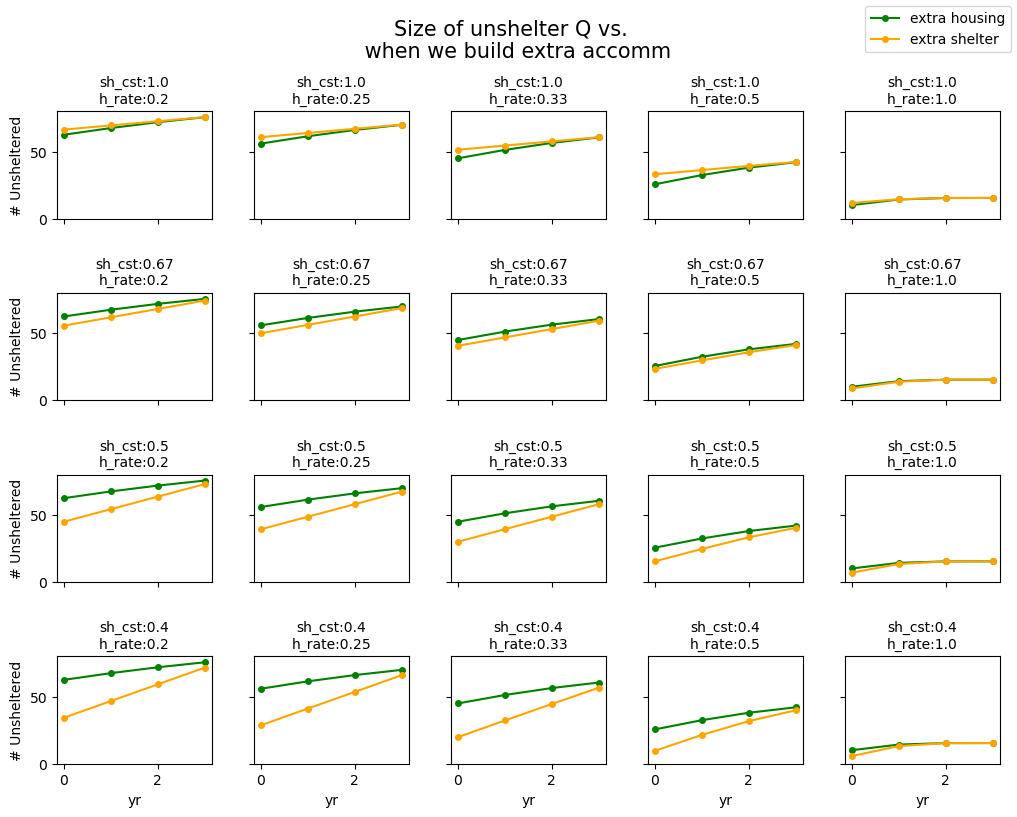

In [8]:
title1 = 'sh_cst:'
title2 = 'h_rate:'
x = [0,1,2,3]
n_rw = len(additional_shelter)
n_cl = len(service_times)
fig, axs = plt.subplots(n_rw, n_cl,  figsize=(10, 8))
for i in range(n_rw):
    for j in range(n_cl):
        line1, = axs[i, j].plot(x, housing_imprv_all1[i][n_cl -1 - j], color = 'green', label = 'extra housing', marker='o', markersize = 4)
        line2, = axs[i, j].plot(x, shelter_imprv_all1[i][n_cl -1 - j], color = 'orange', label = 'extra shelter', marker='o', markersize = 4)
        axs[i, j].set_title(title1 + str(round(12/(12+additional_shelter[i]),2)) + '\n' + title2 + str(round(1/service_times[n_cl -1 - j],2)), fontsize = 10)
        axs[i, j].set_ylim(0,80)

plt.suptitle('Size of unshelter Q vs. \n when we build extra accomm', fontsize = 15)            
fig.legend(handles=[line1, line2]) 
fig.tight_layout()
            
for ax in axs.flat:
    ax.set(xlabel='yr', ylabel='# Unsheltered')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

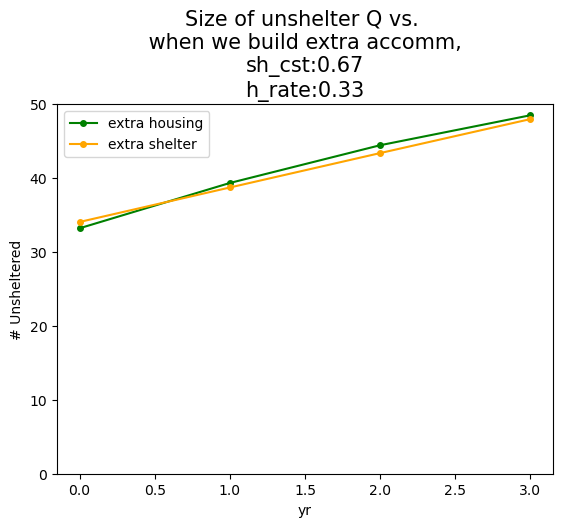

In [22]:
#title1 = 'sh_cst:'
#title2 = 'h_rate:'
#x = [0,1,2,3]
#n_rw = 1
#n_cl = 1
#plt.plot(x, housing_imprv_all3[0][0], color = 'green', label = 'extra housing', marker='o', markersize = 4)
#plt.plot(x, shelter_imprv_all3[0][0], color = 'orange', label = 'extra shelter', marker='o', markersize = 4)
#plt.title('Size of unshelter Q vs. \n when we build extra accomm, \n' + title1 + str(round(12/s,2)) + '\n' + title2 + str(round(1/h,2)), fontsize = 15)
#plt.xlabel('yr')
#plt.ylabel('# Unsheltered')
#plt.ylim(0,50)
#plt.legend()
#plt.show()